In [203]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [204]:
data = pd.read_excel('plant_data.xlsx')

In [205]:
data.sample(5) #Displaying random five rows

,*,Link,Latin Name,Common Name,Light,Moisture,Height,Blooms,Price
259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,quarts: $7.00
265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,quarts: $7.00
141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,quarts: $7.00
246,*,NaN,Sisyrinchium angustifolium,Stout blue-eyed-grass,sun -part sun,mesic,1 ft.,spring,quarts: $7.00
233,*,NaN,Schizachyrium scoparius,Little bluestem grass,sun,dry mesic -dry,2 -4 ft.,summer,plugs: $3.00


In [206]:
data = data.drop(['*','Link'], axis = 1)  #dropping unncessary columns

In [207]:
data.head()

,Latin Name,Common Name,Light,Moisture,Height,Blooms,Price
0,Achillea millefolium,Yarrow,sun -light shade,dry mesic,2 -3 ft.,early summer,plugs: $3.00
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Acorus calamus,Sweet-flag; calamus,full sun -part shade,wet -wet mesic,5 -5 ft.,summer,quarts: $7.00
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Actaea pachypoda,White Baneberry; Doll's-eyes,shade,mesic,2 -3 ft.,spring,quarts: $8.00


#### Dropping all NaN rows which are present alternatively 

In [208]:
data.dropna(axis = 0, how = 'all', inplace = True)

In [209]:
data.head() # Still we can see Nan, so further inspecting

,Latin Name,Common Name,Light,Moisture,Height,Blooms,Price
0,Achillea millefolium,Yarrow,sun -light shade,dry mesic,2 -3 ft.,early summer,plugs: $3.00
2,Acorus calamus,Sweet-flag; calamus,full sun -part shade,wet -wet mesic,5 -5 ft.,summer,quarts: $7.00
4,Actaea pachypoda,White Baneberry; Doll's-eyes,shade,mesic,2 -3 ft.,spring,quarts: $8.00
6,Agastache nepetoides,Yellow Giant Hyssop,sun -light shade,mesic,4 -6 ft.,summer,NaN
7,Agrimonia gryposepala,Tall Agrimony,pt. shade -shade,mesic,2 -4 ft.,summer,quarts: $7.00


In [210]:
data = data.reset_index(drop=True) #Resetting the index

#### Splitting the Price column since it contains both the value and the way it is sold

In [211]:
price_data = data['Price'].str.split(":",n=1,expand=True)

In [212]:
data['Type'] = price_data[0]
data['Price_Value'] = price_data[1]

In [213]:
data = data.drop(['Price'], axis = 1) 

In [214]:
data.head()

,Latin Name,Common Name,Light,Moisture,Height,Blooms,Type,Price_Value
0,Achillea millefolium,Yarrow,sun -light shade,dry mesic,2 -3 ft.,early summer,plugs,$3.00
1,Acorus calamus,Sweet-flag; calamus,full sun -part shade,wet -wet mesic,5 -5 ft.,summer,quarts,$7.00
2,Actaea pachypoda,White Baneberry; Doll's-eyes,shade,mesic,2 -3 ft.,spring,quarts,$8.00
3,Agastache nepetoides,Yellow Giant Hyssop,sun -light shade,mesic,4 -6 ft.,summer,NaN,NaN
4,Agrimonia gryposepala,Tall Agrimony,pt. shade -shade,mesic,2 -4 ft.,summer,quarts,$7.00


#### Cleaning the Price_Value column further

In [215]:
data['Price_Value'] = data['Price_Value'].str.replace('$', '')

In [216]:
data.head()

,Latin Name,Common Name,Light,Moisture,Height,Blooms,Type,Price_Value
0,Achillea millefolium,Yarrow,sun -light shade,dry mesic,2 -3 ft.,early summer,plugs,3.00
1,Acorus calamus,Sweet-flag; calamus,full sun -part shade,wet -wet mesic,5 -5 ft.,summer,quarts,7.00
2,Actaea pachypoda,White Baneberry; Doll's-eyes,shade,mesic,2 -3 ft.,spring,quarts,8.00
3,Agastache nepetoides,Yellow Giant Hyssop,sun -light shade,mesic,4 -6 ft.,summer,NaN,NaN
4,Agrimonia gryposepala,Tall Agrimony,pt. shade -shade,mesic,2 -4 ft.,summer,quarts,7.00


### Observation : When there are two types , Plugs and Quarts , it takes up two rows , therefore filling the above row to the next row

In [217]:
data = data.fillna(method='ffill')

In [218]:
data.head()

,Latin Name,Common Name,Light,Moisture,Height,Blooms,Type,Price_Value
0,Achillea millefolium,Yarrow,sun -light shade,dry mesic,2 -3 ft.,early summer,plugs,3.00
1,Acorus calamus,Sweet-flag; calamus,full sun -part shade,wet -wet mesic,5 -5 ft.,summer,quarts,7.00
2,Actaea pachypoda,White Baneberry; Doll's-eyes,shade,mesic,2 -3 ft.,spring,quarts,8.00
3,Agastache nepetoides,Yellow Giant Hyssop,sun -light shade,mesic,4 -6 ft.,summer,quarts,8.00
4,Agrimonia gryposepala,Tall Agrimony,pt. shade -shade,mesic,2 -4 ft.,summer,quarts,7.00


#### Inspecting the columns and Cleaning it further

In [219]:
data.Height.unique()

array(['2 -3 ft.', '5 -5 ft.', '4 -6 ft.', '2 -4 ft.', '3 -4 ft.',
       '1 -1.5 ft.', '1 -2 ft.', '.5 -1 ft.', '2 -5 ft.', '.5 ft.',
       '3 -5 ft.', '4 -5 ft.', '2 -2.5 ft.', '1 -2.5 ft.', '2 ft.',
       '5 -8 ft.', 'vine', datetime.datetime(2020, 4, 3, 0, 0),
       '4 -8 ft.', '6 -10 ft.', '.5 -1.5 ft.', '3 -6 ft.', '3- 6 in.',
       '1 -3 ft.', '5 -10 ft.', '1.5 -2.5 ft.', '2-3 ft.', '6- 12 ft.',
       '6 -20 ft.', '5 -7 ft.', '2- 5 ft.', '3 -8 ft.', '1 ft.',
       '8 -20 ft.', '30- 50 ft.', '8 -18 ft.'], dtype=object)

In [220]:
height_data = data['Height'].str.split("-",n=1,expand=True)
data['Minimum_Height'] = height_data[0]
data['Maximum_Height'] = height_data[1]

In [221]:
print(data['Minimum_Height'].unique())
print(data['Maximum_Height'].unique())

['2 ' '5 ' '4 ' '3 ' '1 ' '.5 ' '.5 ft.' '2 ft.' 'vine' nan '6 ' '3'
 '1.5 ' '2' '6' '1 ft.' '8 ' '30']
['3 ft.' '5 ft.' '6 ft.' '4 ft.' '1.5 ft.' '2 ft.' '1 ft.' None '2.5 ft.'
 '8 ft.' nan '10 ft.' ' 6 in.' ' 12 ft.' '20 ft.' '7 ft.' ' 5 ft.'
 ' 50 ft.' '18 ft.']


In [222]:
#to treat such anamolies 
data['Minimum_Height'] = data['Minimum_Height'].str.replace(' ft.',' ')
data['Maximum_Height'] = data['Maximum_Height'].str.replace(' ft.', '')

In [223]:
#Dropping the original Height Column 
data = data.drop(['Height'], axis = 1) 

In [224]:
data.head()

,Latin Name,Common Name,Light,Moisture,Blooms,Type,Price_Value,Minimum_Height,Maximum_Height
0,Achillea millefolium,Yarrow,sun -light shade,dry mesic,early summer,plugs,3.00,2,3
1,Acorus calamus,Sweet-flag; calamus,full sun -part shade,wet -wet mesic,summer,quarts,7.00,5,5
2,Actaea pachypoda,White Baneberry; Doll's-eyes,shade,mesic,spring,quarts,8.00,2,3
3,Agastache nepetoides,Yellow Giant Hyssop,sun -light shade,mesic,summer,quarts,8.00,4,6
4,Agrimonia gryposepala,Tall Agrimony,pt. shade -shade,mesic,summer,quarts,7.00,2,4


#### Inspecting the Types of Moisture and Light needed for the Plants

In [225]:
#data.Moisture.unique()
#data.Light.unique()

In [226]:
data.dtypes

Latin Name        object
Common Name       object
Light             object
Moisture          object
Blooms            object
Type              object
Price_Value       object
Minimum_Height    object
Maximum_Height    object
dtype: object

#### Checking the missing data

In [227]:
data.isnull().sum()

Latin Name        0
Common Name       0
Light             0
Moisture          0
Blooms            0
Type              0
Price_Value       0
Minimum_Height    1
Maximum_Height    9
dtype: int64

#### Rows and Columns present in the dataframe

In [228]:
data.shape

(195, 9)

#### Displaying the Missing Data only

In [229]:
null_data = data[data.isnull().any(axis=1)]
null_data

,Latin Name,Common Name,Light,Moisture,Blooms,Type,Price_Value,Minimum_Height,Maximum_Height
16,Asarum canadense,Wild-ginger,shade,mesic,spring,"3"" pots",5.00,.5,None
53,Carex tenera,Quill sedge,part sun -light shade,wet mesic,summer,quarts,7.00,2,None
59,Clematis virginiana,Virgin's bower,sun -light shade,medium -wet mesic,summer,plugs,3.00,vine,None
60,Clematis virginiana,Virgin's bower,sun -light shade,medium -wet mesic,summer,quarts,7.00,vine,None
61,Collinsonia canadensis,"Stoneroot, Richweed",shade -pt. sun,mesic,late summer,quarts,7.00,NaN,NaN
76,Fragaria virginiana,Wild strawberry,sun -part sun,mesic -dry mesic,spring,quarts,7.00,.5,None
158,Senecio pauperculus,Balsam ragwort,light shade -part sun,dry mesic,spring,plugs,3.00,2,None
159,(Packera paupercula),Balsam ragwort,light shade -part sun,dry mesic,spring,plugs,3.00,2,None
161,Sisyrinchium angustifolium,Stout blue-eyed-grass,sun -part sun,mesic,spring,quarts,7.00,1,None


##### Since there are few values , I decided to fill it with 0 

In [230]:
data['Maximum_Height'] = data['Maximum_Height'].fillna(0)
data['Minimum_Height'] = data['Minimum_Height'].fillna(0)

In [231]:
data.isnull().sum()

Latin Name        0
Common Name       0
Light             0
Moisture          0
Blooms            0
Type              0
Price_Value       0
Minimum_Height    0
Maximum_Height    0
dtype: int64

##### On inspecting further there was one row  Height Columns that had "vine" and height in inches. hence, removing it

In [232]:
data = data.loc[data.Minimum_Height != 'vine']
data = data.loc[data.Maximum_Height !=  ' 6 in.' ]

In [233]:
data['Minimum_Height'].unique()

array(['2 ', '5 ', '4 ', '3 ', '1 ', '.5 ', 0, '6 ', '1.5 ', '2', '6',
       '8 ', '30'], dtype=object)

In [234]:
data['Minimum_Height'] = data['Minimum_Height'].astype(float)
data['Maximum_Height'] = data['Maximum_Height'].astype(float)
data['Price_Value'] = data['Price_Value'].astype(float)

In [235]:
#Checking the type of each column again
data.dtypes

Latin Name         object
Common Name        object
Light              object
Moisture           object
Blooms             object
Type               object
Price_Value       float64
Minimum_Height    float64
Maximum_Height    float64
dtype: object

## EDA

In [236]:
print("The range of height of a plant is from :", data['Minimum_Height'].min(),"feet to",data['Maximum_Height'].max(),"feet")

The range of height of a plant is from : 0.0 feet to 50.0 feet


In [237]:
#Top 3 shortest plants
data.nsmallest(3,['Maximum_Height'])

,Latin Name,Common Name,Light,Moisture,Blooms,Type,Price_Value,Minimum_Height,Maximum_Height
16,Asarum canadense,Wild-ginger,shade,mesic,spring,"3"" pots",5.0,0.5,0.0
53,Carex tenera,Quill sedge,part sun -light shade,wet mesic,summer,quarts,7.0,2.0,0.0
61,Collinsonia canadensis,"Stoneroot, Richweed",shade -pt. sun,mesic,late summer,quarts,7.0,0.0,0.0


In [238]:
#Top 3 longest plants
data.nlargest(3,['Maximum_Height'])

,Latin Name,Common Name,Light,Moisture,Blooms,Type,Price_Value,Minimum_Height,Maximum_Height
187,Thuja occidentalis,"White Cedar, Arbor vitae",shade- part sun,medium to wet,spring,quarts,7.0,30.0,50.0
137,Prunus virginiana,Choke cherry,shade -part sun,mesic -dry,spring,1-gal,18.0,6.0,20.0
182,Staphylea trifolia,Bladdernut,shade -part sun,mesic -wet mesic,early spring,1-gal,18.0,8.0,20.0


In [239]:
#Top 3 non expensive plants
data.nsmallest(3,['Price_Value'])

,Latin Name,Common Name,Light,Moisture,Blooms,Type,Price_Value,Minimum_Height,Maximum_Height
0,Achillea millefolium,Yarrow,sun -light shade,dry mesic,early summer,plugs,3.0,2.0,3.0
7,Andropogon gerardii,Big bluestem grass,full sun,mesic -dry mesic,summer,plugs,3.0,4.0,6.0
10,Anemone virginiana,Thimbleweed,sun -shade,mesic,summer,plugs,3.0,2.0,4.0


In [240]:
#Top 3 expensive plants
data.nlargest(3,['Price_Value'])

,Latin Name,Common Name,Light,Moisture,Blooms,Type,Price_Value,Minimum_Height,Maximum_Height
57,Cephalanthus occidentalis,Buttonbush,sun -part shade,wet mesic -wet,summer,1-gal,18.0,5.0,8.0
71,Euonymus obovata,Creeping Strawberry-bush,shade -light shade,mesic (medium),spring,1-gal,18.0,0.5,1.5
94,Hypericum prolificum,Shrubby st.john's-wort,sun -part shade,medium -dry,summer,1-gal,18.0,5.0,10.0


#### Making Quantiles to observe the Price Range

In [241]:
data.Price_Value.quantile([0.25,0.5,0.75,0.9,0.99])

0.25     3.0
0.50     7.0
0.75     7.0
0.90     7.9
0.99    18.0
Name: Price_Value, dtype: float64

### Observation : 50% of plants fall under 7 dollars

Text(0.5, 1.0, 'Distribution of Price')

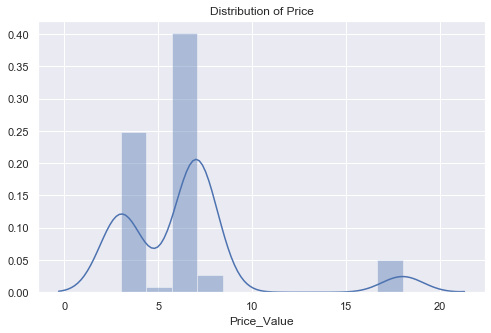

In [242]:
plt.figure(figsize=(8,5))
sns.distplot(data['Price_Value']).set_title('Distribution of Price')

#### Finding the plants that fall above and below the Price Average

In [243]:
#average_price = 6.40
below_avg = data[data['Price_Value'] <= data['Price_Value'].mean()]
below_avg[:10]

,Latin Name,Common Name,Light,Moisture,Blooms,Type,Price_Value,Minimum_Height,Maximum_Height
0,Achillea millefolium,Yarrow,sun -light shade,dry mesic,early summer,plugs,3.0,2.0,3.0
7,Andropogon gerardii,Big bluestem grass,full sun,mesic -dry mesic,summer,plugs,3.0,4.0,6.0
10,Anemone virginiana,Thimbleweed,sun -shade,mesic,summer,plugs,3.0,2.0,4.0
16,Asarum canadense,Wild-ginger,shade,mesic,spring,"3"" pots",5.0,0.5,0.0
21,Aster cordifolius,Heart-leaved Aster,light shade,mesic -dry mesic,late fall,plugs,3.0,2.0,3.0
28,Aster lateriflorus,Calico Aster,shade -pt.sun,mesic (medium),fall,plugs,3.0,2.0,3.0
29,(Symphyotrichum lateriflorum),Calico Aster,shade -pt.sun,mesic (medium),fall,plugs,3.0,2.0,3.0
34,Aster sagittifolius,Arrow-leaved Aster,sun -light shade,mesic -dry mesic,fall,plugs,3.0,3.0,5.0
39,Aster umbellatus,Tall Flat-top White Aster,sun,mesic -wet mesic,early fall,plugs,3.0,3.0,4.0
40,(Doellingeria umbellata),Tall Flat-top White Aster,sun,mesic -wet mesic,early fall,plugs,3.0,3.0,4.0


In [244]:
above_avg = data[data['Price_Value'] >= data['Price_Value'].mean()]
above_avg[:5]

,Latin Name,Common Name,Light,Moisture,Blooms,Type,Price_Value,Minimum_Height,Maximum_Height
1,Acorus calamus,Sweet-flag; calamus,full sun -part shade,wet -wet mesic,summer,quarts,7.0,5.0,5.0
2,Actaea pachypoda,White Baneberry; Doll's-eyes,shade,mesic,spring,quarts,8.0,2.0,3.0
3,Agastache nepetoides,Yellow Giant Hyssop,sun -light shade,mesic,summer,quarts,8.0,4.0,6.0
4,Agrimonia gryposepala,Tall Agrimony,pt. shade -shade,mesic,summer,quarts,7.0,2.0,4.0
5,Agrimonia parviflora,Swamp Agrimony,sun -light shade,mesic -wet mesic,summer,quarts,7.0,3.0,4.0


In [245]:
print("Number of plants below the average price value are:", len(below_avg), "and Number of plants above the average price value are:", len(above_avg))

Number of plants below the average price value are: 69 and Number of plants above the average price value are: 123


In [246]:
data['Blooms'].nunique()

14

#### Looking at the distribution of Plants during various "Blooms" (Seasons)

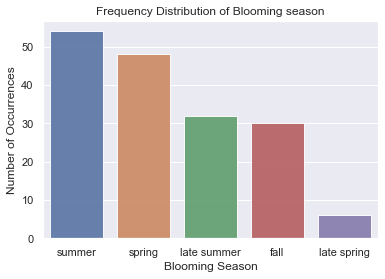

In [247]:
#choosing top 4 kinds of blooms for further analysis 
import matplotlib.pyplot as plt
blooms_count = data['Blooms'].value_counts()[:5]
sns.set(style="darkgrid")
sns.barplot(blooms_count.index, blooms_count.values, alpha=0.9)
plt.title('Frequency Distribution of Blooming season')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Blooming Season', fontsize=12)
plt.show()

#### Sorting the value by Price and finding out the first plant (also the least expensive) of every Bloom (Season)

In [248]:
Price_data = data.sort_values(by='Price_Value')
Price_data.groupby('Blooms').apply(lambda data : data.Price_Value.iloc[0])

Blooms
early fall                    3.0
early spring                  7.0
early summer                  3.0
fall                          3.0
late Summer- fall             3.0
late fall                     3.0
late spring                   3.0
late spring through summer    7.0
late spring- early summer     3.0
late spring- summer           7.0
late summer                   3.0
late summer - fall            3.0
spring                        3.0
summer                        3.0
dtype: float64

#### The Minimum Height and Maximum Height achieved by different seasons

In [249]:
Minimum_Height_data = data.sort_values(by='Minimum_Height')
Minimum_Height_data.groupby('Blooms').apply(lambda data : data.Minimum_Height.iloc[0])

Blooms
early fall                    3.0
early spring                  1.0
early summer                  1.5
fall                          1.0
late Summer- fall             3.0
late fall                     2.0
late spring                   1.0
late spring through summer    1.5
late spring- early summer     1.0
late spring- summer           1.0
late summer                   0.0
late summer - fall            1.0
spring                        0.5
summer                        1.0
dtype: float64

In [250]:
Maximum_Height_data = data.sort_values(by='Maximum_Height')
Maximum_Height_data.groupby('Blooms').apply(lambda data : data.Maximum_Height.iloc[0])

Blooms
early fall                    4.0
early spring                  1.5
early summer                  2.5
fall                          2.0
late Summer- fall             6.0
late fall                     3.0
late spring                   2.5
late spring through summer    2.5
late spring- early summer     3.0
late spring- summer           3.0
late summer                   0.0
late summer - fall            3.0
spring                        0.0
summer                        0.0
dtype: float64

#### The tallest height attained by plants while recieving different kinds of lights

In [251]:
Light_data = data.sort_values(by='Maximum_Height')
Light_data.groupby('Light').apply(lambda data : data.Maximum_Height.iloc[0]).nlargest(5)

Light
part sun               18.0
shade- part sun        12.0
sun -pt. sun            8.0
full sun -pt. shade     7.0
pt. sun                 6.0
dtype: float64

#### Number of plants available for different SKU's

In [252]:
data.Type.value_counts()

quarts     107
plugs       62
1-gal       16
3" pots      4
2" pots      3
Name: Type, dtype: int64

#### The Minimum and Maximum price for each SKU

In [253]:
data.groupby(['Type']).Price_Value.agg([min, max])

,min,max
Type,,
1-gal,8.0,18.0
"2"" pots",4.0,4.0
"3"" pots",5.0,6.0
plugs,3.0,3.0
quarts,7.0,8.0


#### Correlation of data of numeric variables are as follows. Observations: Price Value is highly uncorrelated to Maximum or Minimum Height

In [254]:
data.corr()

,Price_Value,Minimum_Height,Maximum_Height
Price_Value,1.000000,0.235955,0.314361
Minimum_Height,0.235955,1.000000,0.954908
Maximum_Height,0.314361,0.954908,1.000000


#### Maximum and Minimum Height of Each group of Price Values

In [255]:
data.groupby(['Price_Value']).Minimum_Height.agg([min, max]) #no relation between height and price

,min,max
Price_Value,,
3.0,0.5,4.0
4.0,0.5,1.0
5.0,0.5,1.0
6.0,2.0,2.0
7.0,0.0,30.0
8.0,1.0,4.0
18.0,0.5,8.0


#### Observation : 35 or more plants fall in "Sun-light shade" followed by "Sun"

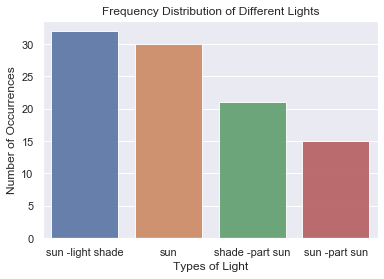

In [256]:
light_count = data['Light'].value_counts()[:4]
sns.set(style="darkgrid")
sns.barplot(light_count.index, light_count.values, alpha=0.9)
plt.title('Frequency Distribution of Different Lights')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Types of Light', fontsize=12)
plt.show()

### DataFrame of Plants in the main seasons 

In [257]:
#blooming in summer plants
SummerPlants = data[data['Blooms'] == "summer"].sort_values(by='Price_Value')
FallPlants = data[data['Blooms']=='fall'].sort_values(by='Price_Value')
SpringPlants = data[data['Blooms']=='spring'].sort_values(by='Price_Value')
LateSummerPlants = data[data['Blooms']=='late summer'].sort_values(by='Price_Value')

In [258]:
#SummerPlants.head()
FallPlants.head()
#SpringPlants.head()
#LateSummerPlants.head()

,Latin Name,Common Name,Light,Moisture,Blooms,Type,Price_Value,Minimum_Height,Maximum_Height
176,Solidago rugosa,Rough goldenrod,sun -light shade,wet mesic,fall,plugs,3.0,3.0,5.0
174,Solidago rigida,Stiff goldenrod,sun,mesic -dry mesic,fall,plugs,3.0,3.0,5.0
28,Aster lateriflorus,Calico Aster,shade -pt.sun,mesic (medium),fall,plugs,3.0,2.0,3.0
29,(Symphyotrichum lateriflorum),Calico Aster,shade -pt.sun,mesic (medium),fall,plugs,3.0,2.0,3.0
172,Solidago riddellii,Riddell's goldenrod,sun,wet mesic -mesic,fall,plugs,3.0,2.0,4.0
